In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def make_state(elk, wolves):
    """Make a system object for the predator-prey model.
    
    
    returns: State object
    
    """

    return State(elk=elk,wolves=wolves)

In [3]:
def make_system(alpha, beta, gamma, delta):
    """Make a system object for the predator-prey model.
    
    alpha,
    beta,
    gamma,
    delta
    
    returns: State object
    """

    return System(alpha=alpha, beta=beta, gamma=gamma, delta=delta)

In [4]:
def update(state,syst):
    
    dx=(syst.alpha * state.elk) - (syst.beta * state.elk * state.wolves)
    
    dy=(syst.delta * state.elk * state.wolves) - (syst.gamma * state.wolves)
    
    return make_state(state.elk+dx,state.wolves+dy)
    

In [10]:
def run_sim(state,syst,update,end):
   
    frame = TimeFrame(columns=('elk','wolves'))
    frame.row[0] = state
    for t in linrange(end):
        frame.row[t+1] = update(frame.row[t], syst)

    
    return frame


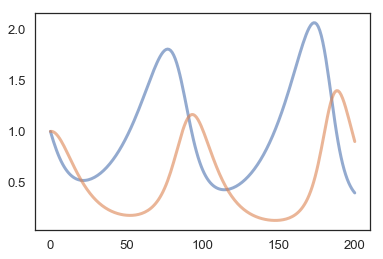

In [12]:
state=State(elk=1,wolves=1)
syst=System(alpha=.05,beta=.1,gamma=.1,delta=.1)
sim=run_sim(state,syst,update,200)#1650
#print(sim)
plot(sim.index,sim.elk,sim.wolves)

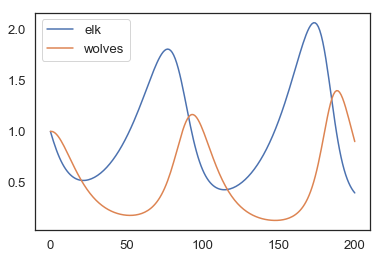

In [11]:
sim.plot()
